In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
inputs = keras.Input(shape=(784,))
#img_inputs = keras.Input(shape=(32, 32, 3))

In [4]:
inputs.shape

TensorShape([None, 784])

In [4]:
dense = layers.Dense(64, activation="relu")
x = dense(inputs)

In [5]:
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10)(x)

In [6]:
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [10]:
pip install pydot 

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


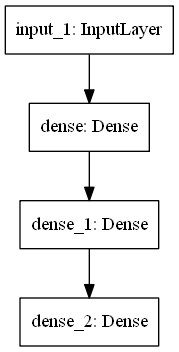

In [8]:
keras.utils.plot_model(model, "my_first_model.png")

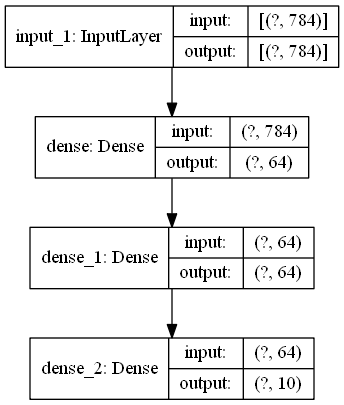

In [9]:
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

In [23]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

In [37]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/10
750/750 [==============================] - 1s 2ms/step - loss: 4.6197 - accuracy: 0.9232 - val_loss: 5.0765 - val_accuracy: 0.9233
Epoch 2/10
750/750 [==============================] - 1s 2ms/step - loss: 4.3531 - accuracy: 0.9239 - val_loss: 5.2389 - val_accuracy: 0.9202
Epoch 3/10
750/750 [==============================] - 1s 2ms/step - loss: 4.1336 - accuracy: 0.9254 - val_loss: 5.0241 - val_accuracy: 0.9238
Epoch 4/10
750/750 [==============================] - 1s 2ms/step - loss: 4.1438 - accuracy: 0.9264 - val_loss: 6.4837 - val_accuracy: 0.9015oss: 4.0488 - ac
Epoch 5/10
750/750 [==============================] - 1s 2ms/step - loss: 3.9860 - accuracy: 0.9265 - val_loss: 5.1298 - val_accuracy: 0.9227
Epoch 6/10
750/750 [==============================] - 1s 2ms/step - loss: 3.8177 - accuracy: 0.9262 - val_loss: 4.5018 - val_accuracy: 0.9250250 - accuracy: 0. - ETA: 0s - loss: 3.7405 - accu
Epoch 7/10
750/750 [==============================] - 1s 2ms/step - loss: 3.6988 -

In [27]:
model.save("path_to_my_model")
del model
# Recreate the exact same model purely from the file:
model = keras.models.load_model("path_to_my_model")


INFO:tensorflow:Assets written to: path_to_my_model\assets


In [28]:
encoder_input = keras.Input(shape=(28, 28, 1), name="img")
x = layers.Conv2D(16, 3, activation="relu")(encoder_input)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name="encoder")
encoder.summary()

x = layers.Reshape((4, 4, 1))(encoder_output)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu")(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation="relu")(x)

autoencoder = keras.Model(encoder_input, decoder_output, name="autoencoder")
autoencoder.summary()


Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d (Global (None, 16)                0   

In [29]:
encoder_input = keras.Input(shape=(28, 28, 1), name="original_img")
x = layers.Conv2D(16, 3, activation="relu")(encoder_input)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name="encoder")
encoder.summary()

decoder_input = keras.Input(shape=(16,), name="encoded_img")
x = layers.Reshape((4, 4, 1))(decoder_input)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu")(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation="relu")(x)

decoder = keras.Model(decoder_input, decoder_output, name="decoder")
decoder.summary()

autoencoder_input = keras.Input(shape=(28, 28, 1), name="img")
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
autoencoder = keras.Model(autoencoder_input, decoded_img, name="autoencoder")
autoencoder.summary()


Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
original_img (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 16)                0   

In [33]:
def get_model():
    inputs = keras.Input(128)
    outputs = layers.Dense(1)(inputs)
    return keras.Model(inputs, outputs)


model1 = get_model()
model2 = get_model()
model3 = get_model()

inputs = keras.Input(shape=(128,))
y1 = model1(inputs)
y2 = model2(inputs)
y3 = model3(inputs)
outputs = layers.average([y1, y2, y3])
ensemble_model = keras.Model(inputs=inputs, outputs=outputs)


In [34]:
ensemble_model.summary()

Model: "functional_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 128)]        0                                            
__________________________________________________________________________________________________
functional_9 (Functional)       (None, 1)            129         input_9[0][0]                    
__________________________________________________________________________________________________
functional_11 (Functional)      (None, 1)            129         input_9[0][0]                    
__________________________________________________________________________________________________
functional_13 (Functional)      (None, 1)            129         input_9[0][0]                    
______________________________________________________________________________________

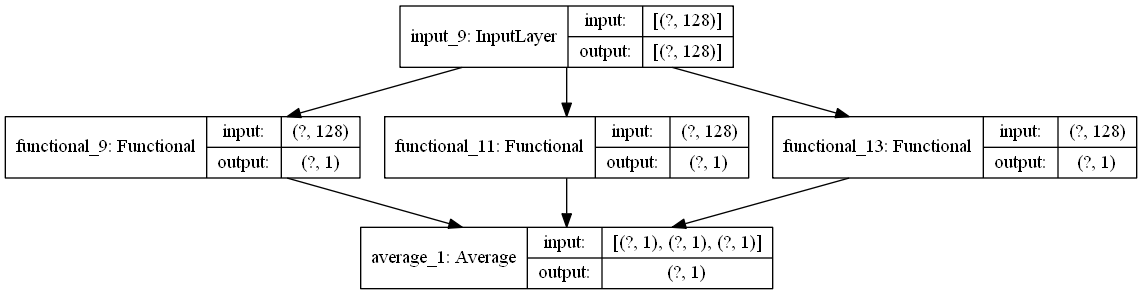

In [35]:
keras.utils.plot_model(ensemble_model, "ensemble_model.png", show_shapes=True)